In [29]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils.average_spectra import average_dataframe
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)


In [6]:
ndvi_31 = pd.read_csv("../data/NDVI/Lettuce_2017-03-31.csv", header=None)
ndvi_07 = pd.read_csv("../data/NDVI/Lettuce_2017-04-07.csv", header=None)
ndvi_14 = pd.read_csv("../data/NDVI/Lettuce_2017-04-14.csv", header=None)
ndvi_28 = pd.read_csv("../data/NDVI/Lettuce_2017-04-28.csv", header=None)
ir_31 = np.repeat(np.array([3,2,1,0]), 3)
ir_07 = np.repeat(np.array([3,2,1,0]), 9)
ir_14 = np.repeat(np.array([3,2,1,0]), 9)
ir_28 = np.repeat(np.array([3,2,1,0]), 9)
ir_28 = np.delete(ir_28, 32)

In [7]:
print(ndvi_31.shape, ndvi_07.shape, ndvi_14.shape, ndvi_28.shape)

(12, 1) (36, 1) (36, 1) (35, 1)


In [8]:
ndvi = np.concatenate((ndvi_31, ndvi_07, ndvi_14, ndvi_28), axis=0)
ir = np.concatenate((ir_31, ir_07, ir_14, ir_28), axis=0)

([<matplotlib.axis.XTick at 0x7f3bf5cc6908>,
 <a list of 4 Text xticklabel objects>)

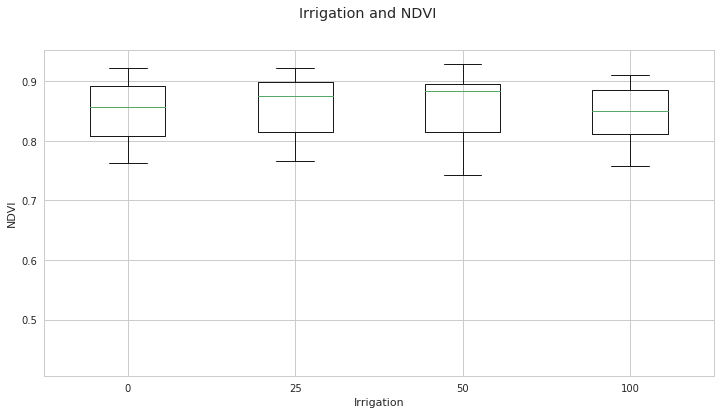

In [9]:
fig = plt.figure()
plt.boxplot((ndvi[np.where(ir == 0)], ndvi[np.where(ir == 1)], ndvi[np.where(ir == 2)], ndvi[np.where(ir == 3)]))
fig.suptitle("Irrigation and NDVI")
plt.xlabel("Irrigation")
plt.ylabel("NDVI")
plt.xticks([1, 2, 3, 4], [0, 25, 50, 100])

In [10]:
wp_df = pd.read_csv("../data/WaterPotential/Lettuce.csv").as_matrix()
wp_df = wp_df[:,1:].astype(float)
wp_100 = wp_df[:3].flatten()
wp_50 = wp_df[3:6].flatten()
wp_25 = wp_df[6:9].flatten()
wp_0 = wp_df[9:].flatten()

([<matplotlib.axis.XTick at 0x7f3bf3a10278>,
 <a list of 4 Text xticklabel objects>)

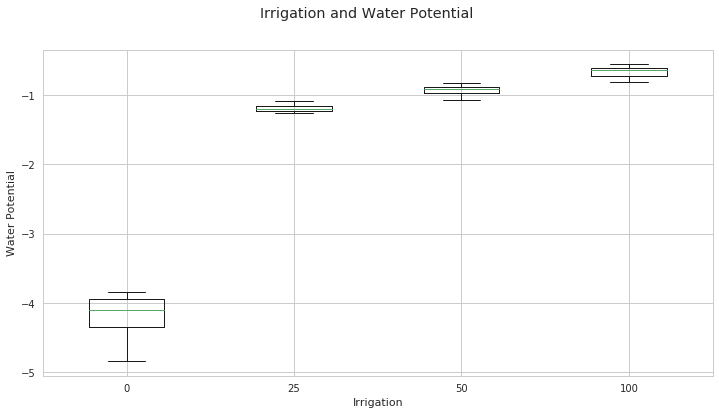

In [11]:
fig = plt.figure()
plt.boxplot((wp_0, wp_25, wp_50, wp_100))
fig.suptitle("Irrigation and Water Potential")
plt.xlabel("Irrigation")
plt.ylabel("Water Potential")
plt.xticks([1, 2, 3, 4], [0, 25, 50, 100])

In [12]:
ndvi.mean()

0.84679366832563763

In [14]:
ndvi.std()

0.073321245539688315

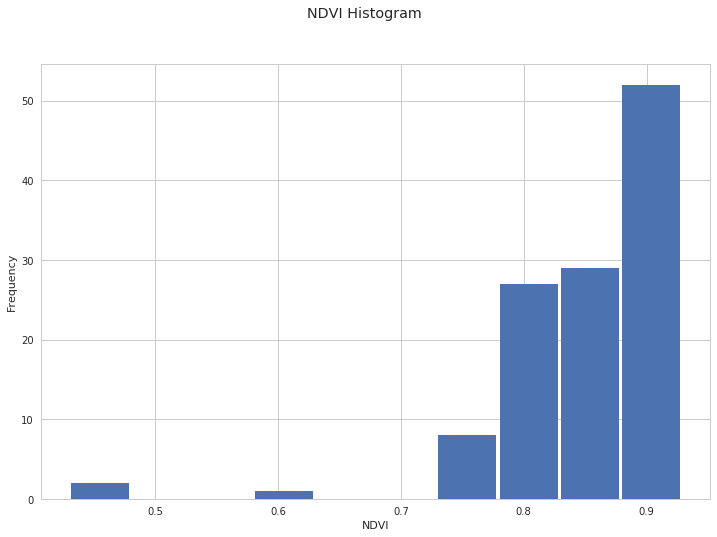

In [30]:
fig = plt.figure()
plt.hist(ndvi, rwidth=0.95)
fig.suptitle("NDVI Histogram")
plt.xlabel("NDVI")
plt.ylabel("Frequency")